In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [4]:
iris = pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.shape

(150, 6)

In [6]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [7]:
iris['Species'].replace({'Iris-virginica':0,'Iris-versicolor':1,'Iris-setosa':2},inplace=True)

Now, we will spearate data for training and testing

In [8]:
X = iris.loc[:,['SepalLengthCm','SepalWidthCm']].values
y = iris.loc[:,'Species'].values

In [9]:
X.shape

(150, 2)

In [10]:
y.shape

(150,)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [12]:
#Finding the number of neighbours to consider using square root metho
np.sqrt(X_train.shape[0])

10.954451150103322

In [13]:
#thus, using k = 11
k = 11

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [15]:
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

In [16]:
#Calculating accuracy score
acc = accuracy_score(y_test, knn.predict(X_test))*100
acc

80.0

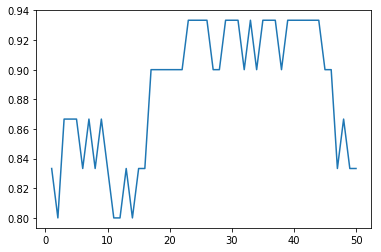

In [17]:
#Using interativ method to find the best number of neighbours to be consodered.
accuracy = []
new = []
for i in range(1, 51):
  knn = KNeighborsClassifier(n_neighbors=i)
  x = knn.fit(X_train, y_train)
  accuracy.append(accuracy_score( y_test, knn.predict(X_test)))
  new.append(i)
plt.plot( new, accuracy)

We can c;early see that me get a maximum accuracy of around 93.5% when the number of neighbours considered is 24, 25, 35, etc. So, we will comsoder the least value and assume 24

In [18]:
knn = KNeighborsClassifier(n_neighbors=24)
x = knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print('Accuracy Score:',(accuracy_score(y_test,y_pred)*100),'%')
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))

Accuracy Score: 93.33333333333333 %
Confusion Matrix:
 [[ 7  2  0]
 [ 0  5  0]
 [ 0  0 16]]


##Making a Boundary on the KNN Classifier


In [19]:
#Lets make a meshgrid
a1 = np.arange(start=X_train[:,0].min()-1, stop = X_train[:,0].max()+1, step = 0.01)
a2 = np.arange(start=X_train[:,1].min()-1, stop = X_train[:,1].max()+1, step = 0.01)
XX, YY = np.meshgrid(a1,a2)

In [20]:
print(XX.shape)
print(YY.shape)

(420, 560)
(420, 560)


In [21]:
input = np.array([XX.ravel(), YY.ravel()]).T
input.shape

(235200, 2)

In [22]:
output = knn.predict(input).reshape(XX.shape)
output.shape

(420, 560)

Text(0.5, 1.0, 'Decision Boundary')

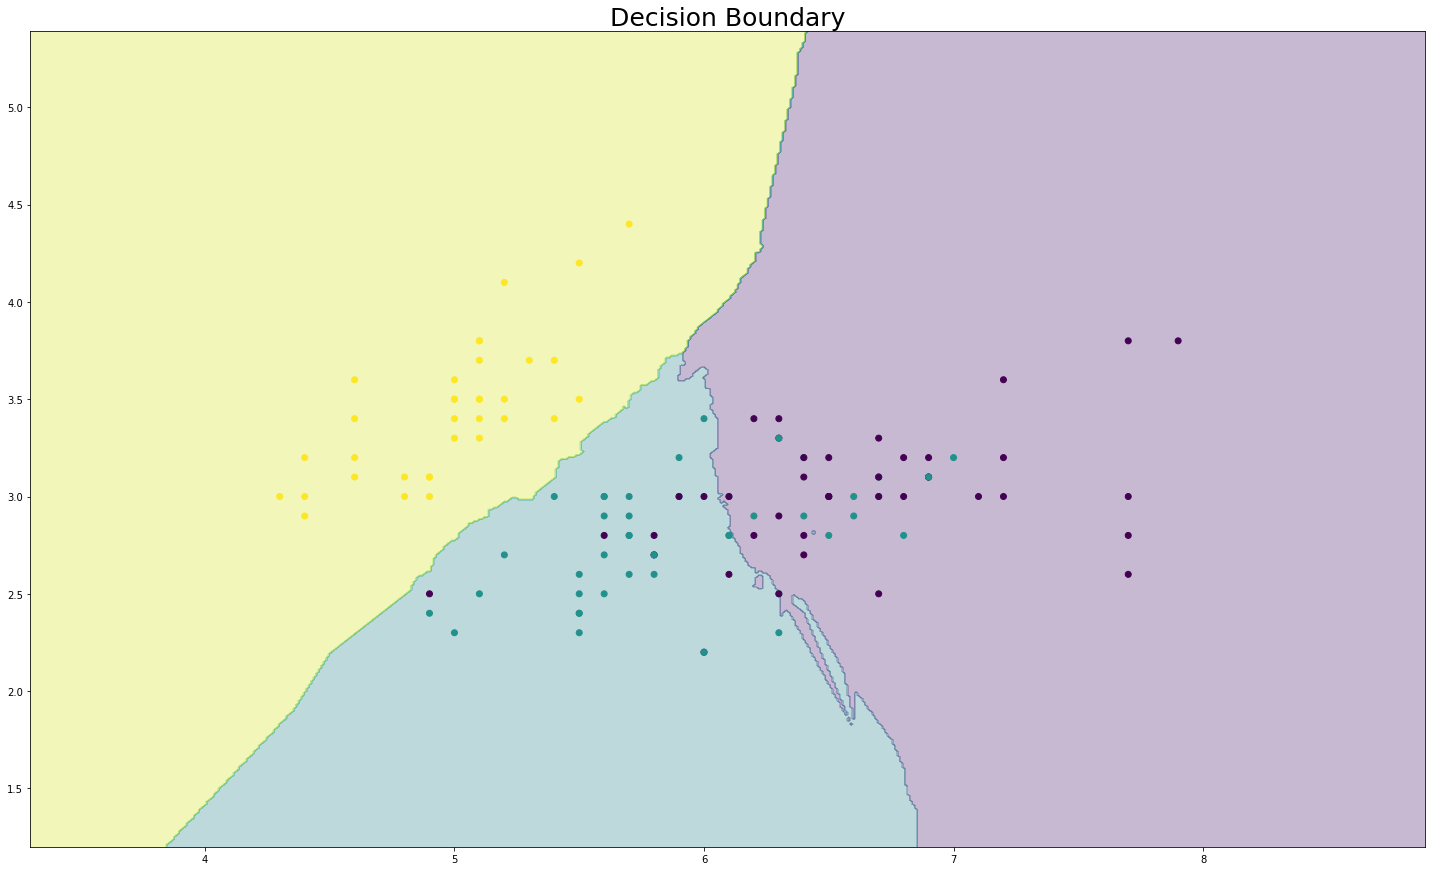

In [31]:
plt.figure(figsize=(25,15))
plt.contourf(XX,YY,output,alpha=0.3)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.title('Decision Boundary',fontsize=25)

In [24]:
_